# EDA<a name="second-step"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import math
import datetime as dt

### Import Cleaned CSV File

In [3]:
df = pd.read_csv('clean_df.csv', index_col=0)

Let's make sure everything got transferred over well.

In [4]:
df.head()

,year,name,season_position,age,team,games_played,games_started,minutes_played,PER,TS%,...,weight,college,year_born,birth_city,birth_state,year_start,year_end,career_position,month_born,day_born
0,1974,Zaid Abdul-Aziz,C,27.0,HOU,79,50,2459.0,15.9,0.516,...,233.7,Iowa State University,1946,Brooklyn,New York,1969,1978,C-F,4,7
1,1974,Kareem Abdul-Jabbar,C,26.0,MIL,81,72,3548.0,24.4,0.564,...,224.9,"University of California, Los Angeles",1947,New York,New York,1970,1989,C,4,16
2,1974,Don Adams,SF,26.0,DET,74,46,2298.0,10.9,0.457,...,209.5,Northwestern University,1947,Atlanta,Georgia,1971,1977,F,11,27
3,1974,Rick Adelman,PG,27.0,CHI,55,12,618.0,10.0,0.447,...,174.2,Loyola Marymount University,1946,Lynwood,California,1969,1975,G,6,16
4,1974,Lucius Allen,PG,26.0,MIL,72,48,2388.0,18.8,0.536,...,174.2,"University of California, Los Angeles",1947,Kansas City,Kansas,1970,1979,G,9,26


In [5]:
pd.set_option('display.max_columns', None) # Allows us to see all columns
pd.set_option('display.expand_frame_repr', False)
df.describe()

,year,age,games_played,games_started,minutes_played,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,hall_of_fame,height,weight,year_born,year_start,year_end,month_born,day_born
count,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.00000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.00000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000
mean,1998.149447,26.766136,50.267232,24.010132,1179.116128,12.444922,0.500227,0.143320,0.317651,6.188085,13.706844,9.948314,13.091656,1.648163,1.409251,1.237147,1.19434,2.432491,0.065554,-1.782323,-0.550139,-2.332247,0.557256,189.888645,411.222320,0.436566,20.225194,57.871450,0.184426,169.663452,353.35087,0.452975,0.459935,95.531297,126.820985,0.695006,62.147596,146.951776,209.099372,112.939841,39.881972,24.381022,73.974658,111.205368,495.533781,0.057285,78.766871,212.465668,1969.153247,1993.660188,2002.360904,6.479371,15.976131
std,12.220774,3.939801,26.673716,27.662987,928.032941,6.106793,0.098491,0.184117,0.226246,4.883353,6.634431,5.051925,9.379346,1.016836,1.771939,2.026936,1.21441,2.944886,0.100988,3.800698,2.251684,4.698575,1.334502,184.024302,384.223456,0.099671,37.364214,99.492975,0.187270,172.735785,347.77211,0.104168,0.101696,107.624584,137.487968,0.198192,67.289902,145.506138,207.328794,137.198051,38.676966,36.572428,65.795086,82.367474,483.023447,0.232392,3.730696,27.231868,13.448670,12.377576,12.287982,3.385296,8.817149
min,1974.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-1.00000,-2.100000,-2.519000,-73.800000,-30.400000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,132.300000,1919.000000,1960.000000,1974.000000,1.000000,1.000000
25%,1988.000000,24.000000,27.000000,0.000000,325.000000,9.800000,0.470000,0.000000,0.198000,2.600000,8.800000,6.000000,6.400000,1.100000,0.300000,0.000000,0.20000,0.200000,0.033000,-3.400000,-1.700000,-4.200000,-0.200000,38.000000,91.000000,0.402000,0.000000,0.000000,0.000000,32.000000,74.00000,0.421000,0.430000,16.000000,24.000000,0.644000,12.000000,34.000000,48.000000,18.000000,9.000000,3.000000,20.000000,37.000000,100.000000,0.000000,76.000000,189.600000,1959.000000,1984.000000,1993.000000,3.000000,8.000000
50%,1999.000000,26.000000,56.000000,11.000000,1012.000000,12.700000,0.514000,0.039000,0.286000,5.400000,12.700000,9.200000,10.500000,1.500000,0.900000,0.500000,0.80000,1.400000,0.076000,-1.500000,-0.500000,-1.800000,0.000000,135.000000,301.000000,0.444000,1.000000,7.000000,0.194000,114.000000,246.00000,0.465000,0.472000,58.000000,80.000000,0.742000,38.000000,106.000000,149.000000,64.000000,29.000000,11.000000,61.000000,102.000000,348.000000,0.000000,79.100000,213.900000,1969.000000,1994.000000,2004.000000,6.000000,16.000000
75%,2009.000000,29.000000,76.000000,45.000000,1923.000000,15.600000,0.549000,0.262000,0.392000,9.000000,18.100000,13.400000,17.800000,2.100000,1.900000,1.900000,1.80000,3.800000,0.114000,0.300000,0.700000,0.300000,0.900000,292.000000,633.000000,0.486000,22.000000,70.000000,0.339000,256.000000,535.00000,0.500000,0.508000,138.000000,185.000000,0.810000,91.000000,212.000000,301.000000,157.000000,60.000000,2

In [7]:
pd.reset_option('all') # Reseting table views

/var/folders/s_/j3ydldlx0dq_zfvvm27bphpr0000gn/T/ipykernel_59535/3419224780.py:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all') # Reseting table views
/var/folders/s_/j3ydldlx0dq_zfvvm27bphpr0000gn/T/ipykernel_59535/3419224780.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all') # Reseting table views
/var/folders/s_/j3ydldlx0dq_zfvvm27bphpr0000gn/T/ipykernel_59535/3419224780.py:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all') # Reseting table views


### Initial Exploration

We'll group this by player to get a different view of the table.

First, we'll group by player name and average the numeric columns. While this isn't necessarily helpful for every single numeric column (like `Age`), it will be helpful to see what players averaged over their careers in terms of points, assists, rebounds, and so on.

In [9]:
unique_player_df = df.groupby(['name'], as_index=False).mean()

/var/folders/s_/j3ydldlx0dq_zfvvm27bphpr0000gn/T/ipykernel_59535/3300635964.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unique_player_df = df.groupby(['name'], as_index=False).mean()


In [10]:
unique_player_df.head()

,name,year,age,games_played,games_started,minutes_played,PER,TS%,3PAr,FTr,...,PF,PTS,hall_of_fame,height,weight,year_born,year_start,year_end,month_born,day_born
0,A.C. Green,1993.888889,29.888889,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,...,143.388889,718.222222,0.0,79.9,233.7,1960.0,1986.0,2001.0,10.0,4.0
1,A.J. Bramlett,2000.000000,23.000000,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000,0.000000,...,13.000000,8.000000,0.0,77.2,194.0,1973.0,2000.0,2000.0,1.0,10.0
2,A.J. English,1991.500000,23.500000,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047,0.241000,...,143.500000,751.000000,0.0,77.2,209.5,1963.0,1991.0,1992.0,7.0,11.0
3,A.J. Guyton,2002.000000,23.000000,26.666667,4.666667,415.333333,4.366667,0.324000,0.371,0.068333,...,19.333333,147.333333,0.0,81.9,218.3,1976.0,2001.0,2003.0,2.0,12.0
4,A.J. Hammons,2017.000000,24.000000,22.000000,0.000000,163.000000,8.400000,0.472000,0.238,0.476000,...,21.000000,48.000000,0.0,78.0,218.3,1993.0,2017.0,2017.0,8.0,27.0


### Correlations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20529 entries, 0 to 20758
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             20529 non-null  int64  
 1   name             20529 non-null  object 
 2   season_position  20529 non-null  object 
 3   age              20529 non-null  float64
 4   team             20529 non-null  object 
 5   games_played     20529 non-null  int64  
 6   games_started    20529 non-null  int64  
 7   minutes_played   20529 non-null  float64
 8   PER              20529 non-null  float64
 9   TS%              20529 non-null  float64
 10  3PAr             20529 non-null  float64
 11  FTr              20529 non-null  float64
 12  ORB%             20529 non-null  float64
 13  DRB%             20529 non-null  float64
 14  TRB%             20529 non-null  float64
 15  AST%             20529 non-null  float64
 16  STL%             20529 non-null  float64
 17  BLK%        

Let's look at correlations to the `hall_of_fame` column. It's our only binary column that separates "great" players from the rest. While it is a binary column, and therefore will likely produce low correlation values, it will be valuable to see what could impact that column the most.

<Axes: >

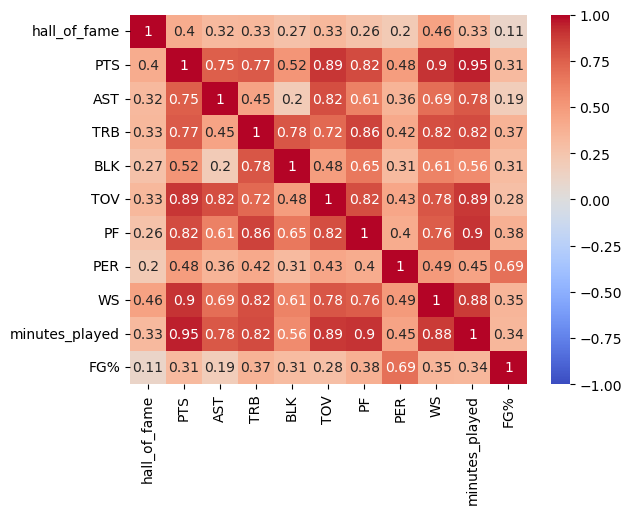

In [18]:
test_df = unique_player_df[['hall_of_fame', 'PTS', 'AST', 'TRB', 'BLK', 'TOV', 'PF', 'PER', 'WS', 'minutes_played',
                           'FG%']]

sns.heatmap(test_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

As we can see, `PTS` and `WS` are the top two categories with `TRB`, `TOV` and `minutes_played` tied for third. `AST` are near behind.

Let's add `3P` and `3P%`. My expectation is that there is a lower correlation since the 3-point shot wasn't introduced until the 70s and didn't grow in it's popularity until the 2010s.

<Axes: >

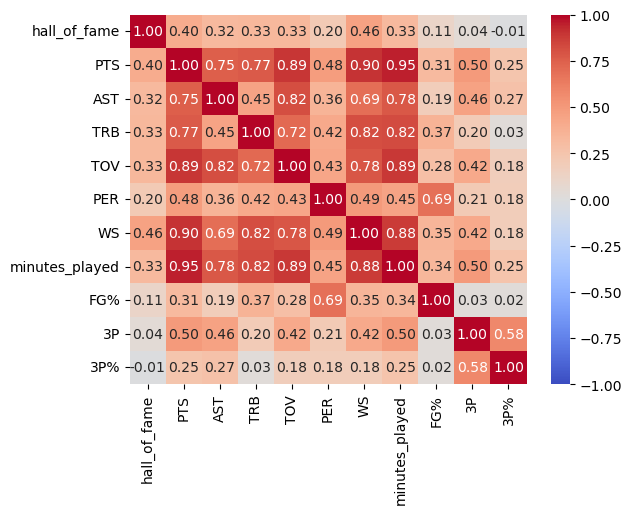

In [21]:
test_df = unique_player_df[['hall_of_fame', 'PTS', 'AST', 'TRB', 'TOV', 'PER', 'WS', 'minutes_played',
                           'FG%', '3P', '3P%']]

sns.heatmap(test_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt=".2f")

As expected, this has a low correlation with most statistics including `hall_of_fame`.

Let's look at one well-known player, Michael Jordan, to see if there is a correlation in those same statistics for him.

<Axes: >

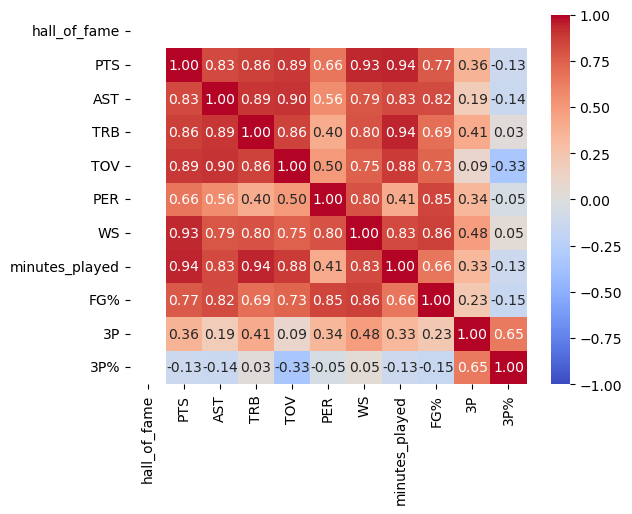

In [23]:
test_df2 = df.loc[df['name']=='Michael Jordan', ['hall_of_fame', 'PTS', 'AST', 'TRB', 'TOV', 'PER', 'WS', 'minutes_played',
                           'FG%', '3P', '3P%']]

sns.heatmap(test_df2.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt='.2f')

A very similar look in correlations with actually a better **negative** correlation in `3P%`.